In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carga y limpieza de datos

## (Hecho con la info obtenida en el notebook LimpiezaDeDatos)

In [2]:
#import io
#ruta = io.StringIO(uploaded['train.csv'].decode('utf-8'))
ejemplo =  pd.read_csv('data/ejemploRespuesta.csv', names = ["id", "precio"] )
test =  pd.read_csv('data/test.csv', parse_dates = ['fecha'])
train = pd.read_csv('data/train.csv',parse_dates = ['fecha'])

In [3]:
#A los nulls los relleno con el promedio de metroscubiertos de todas las publicaciones
train['metroscubiertos']=train['metroscubiertos'].fillna(round(train['metroscubiertos'].mean()))
test['metroscubiertos']=test['metroscubiertos'].fillna(round(test['metroscubiertos'].mean()))
#Luego convierto metroscubiertos a  np.int16
train['metroscubiertos']=train['metroscubiertos'].astype(np.int16)
test['metroscubiertos']=test['metroscubiertos'].astype(np.int16)

In [4]:
#A los nulls los relleno con el promedio de metrostotales de todas las publicaciones
train['metrostotales']=train['metrostotales'].fillna(round(train['metrostotales'].mean()))
test['metrostotales']=test['metrostotales'].fillna(round(test['metrostotales'].mean()))
#Luego convierto metrostotales a  np.int16
train['metrostotales']=train['metrostotales'].astype(np.int16)
test['metrostotales']=test['metrostotales'].astype(np.int16)

In [5]:
#El precio promedio de las publicaciones que no tienen datos de cant de habitaciones esta entre el precio
#promedio de las que tienen 2 y 3 habitaciones
#Entonces voy a asumir que tienen 3 habitaciones, ya que es el valor al cual el precio mas se les asemeja.
train['habitaciones']=train['habitaciones'].fillna(3)
test['habitaciones']=test['habitaciones'].fillna(3)
#Luego convierto a np.int8
train['habitaciones']=train['habitaciones'].astype(np.int8)
test['habitaciones']=test['habitaciones'].astype(np.int8)

In [6]:
#A los que no tienen datos de antiguedad los relleno con la antiguedad promedio (es 8)
train['antiguedad']=train['antiguedad'].fillna(round(train['antiguedad'].mean()))
test['antiguedad']=test['antiguedad'].fillna(round(train['antiguedad'].mean()))
#Luego convierto a np.uint8
train['antiguedad']=train['antiguedad'].astype(np.uint8)
test['antiguedad']=test['antiguedad'].astype(np.uint8)

In [7]:
#El precio promedio de los que tienen NULL en garage es parecido al de los que tienen 2.
#Relleno los nulls de esta columna con un 2.
train['garages']=train['garages'].fillna(2)
test['garages']=test['garages'].fillna(2)
#convierto a np.int8
train['garages']=train['garages'].astype(np.int8)
test['garages']=test['garages'].astype(np.int8)

In [8]:
#El precio promedio de los que tienen NULL en banos es mas parecido al de los que tienen 2.
#Relleno los nulls de esta columna con un 2.
train['banos']=train['banos'].fillna(2)
test['banos']=test['banos'].fillna(2)
#convierto a np.int8
train['banos']=train['banos'].astype(np.int8)
test['banos']=test['banos'].astype(np.int8)

In [9]:
train['gimnasio']=train['gimnasio'].astype(np.int8)
train['usosmultiples']=train['usosmultiples'].astype(np.int8)
train['piscina']=train['piscina'].astype(np.int8)
train['escuelascercanas']=train['escuelascercanas'].astype(np.int8)
train['centroscomercialescercanos']=train['centroscomercialescercanos'].astype(np.int8)
test['gimnasio']=test['gimnasio'].astype(np.int8)
test['usosmultiples']=test['usosmultiples'].astype(np.int8)
test['piscina']=test['piscina'].astype(np.int8)
test['escuelascercanas']=test['escuelascercanas'].astype(np.int8)
test['centroscomercialescercanos']=test['centroscomercialescercanos'].astype(np.int8)

In [10]:
#Creo categoria para los que no tienen categoria en provincia:
train['provincia']=train['provincia'].fillna('N/A')
test['provincia']=test['provincia'].fillna('N/A')
#Creo categoria para los que no tienen categoria en ciudad:
train['ciudad']=train['ciudad'].fillna('N/A')
test['ciudad']=test['ciudad'].fillna('N/A')
#Relleno los nulls en direccion con un - .
train['direccion']=train['direccion'].fillna('-')
test['direccion']=test['direccion'].fillna('-')
#Creo categoria para los que no tienen categoria en tipodepropiedad:
train['tipodepropiedad']=train['tipodepropiedad'].fillna('N/A')
test['tipodepropiedad']=test['tipodepropiedad'].fillna('N/A')

In [11]:
train['titulo']=train['titulo'].fillna(' ')
train['descripcion']=train['descripcion'].fillna(' ')
test['titulo']=test['titulo'].fillna(' ')
test['descripcion']=test['descripcion'].fillna(' ')

In [12]:
train['precio']=train['precio'].astype(np.int32)
train['id']=train['id'].astype(np.int32)
test['id']=test['id'].astype(np.int32)

In [13]:
#Algunas columnas tienen nulls que no se como encararlos. Por ahora los relleno con 0
train=train.fillna(0)
test=test.fillna(0)

# Armado de features:

In [14]:
train.columns

Index(['id', 'titulo', 'descripcion', 'tipodepropiedad', 'direccion', 'ciudad',
       'provincia', 'antiguedad', 'habitaciones', 'garages', 'banos',
       'metroscubiertos', 'metrostotales', 'idzona', 'lat', 'lng', 'fecha',
       'gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas',
       'centroscomercialescercanos', 'precio'],
      dtype='object')

In [15]:
test.columns

Index(['id', 'titulo', 'descripcion', 'tipodepropiedad', 'direccion', 'ciudad',
       'provincia', 'antiguedad', 'habitaciones', 'garages', 'banos',
       'metroscubiertos', 'metrostotales', 'idzona', 'lat', 'lng', 'fecha',
       'gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas',
       'centroscomercialescercanos'],
      dtype='object')

## dummies para tipodepropiedad

In [16]:
#Voy a usar OneHotEncoder para convertir la columna categorica tipodepropiedad en dummies.
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
dummies = enc.fit_transform(train['tipodepropiedad'].values.reshape(-1, 1)).toarray()
dummies = pd.DataFrame(dummies)
dummies_test = enc.fit_transform(test['tipodepropiedad'].values.reshape(-1, 1)).toarray()
dummies_test = pd.DataFrame(dummies_test)

In [17]:
dummies=dummies.add_prefix('tipodepropiedad_')
dummies=dummies.astype(np.int8)
dummies_test=dummies_test.add_prefix('tipodepropiedad_')
dummies_test=dummies_test.astype(np.int8)

In [18]:
dummies.head()

,tipodepropiedad_0,tipodepropiedad_1,tipodepropiedad_2,tipodepropiedad_3,tipodepropiedad_4,tipodepropiedad_5,tipodepropiedad_6,tipodepropiedad_7,tipodepropiedad_8,tipodepropiedad_9,...,tipodepropiedad_15,tipodepropiedad_16,tipodepropiedad_17,tipodepropiedad_18,tipodepropiedad_19,tipodepropiedad_20,tipodepropiedad_21,tipodepropiedad_22,tipodepropiedad_23,tipodepropiedad_24
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
dummies_test.head()

,tipodepropiedad_0,tipodepropiedad_1,tipodepropiedad_2,tipodepropiedad_3,tipodepropiedad_4,tipodepropiedad_5,tipodepropiedad_6,tipodepropiedad_7,tipodepropiedad_8,tipodepropiedad_9,...,tipodepropiedad_13,tipodepropiedad_14,tipodepropiedad_15,tipodepropiedad_16,tipodepropiedad_17,tipodepropiedad_18,tipodepropiedad_19,tipodepropiedad_20,tipodepropiedad_21,tipodepropiedad_22
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
Numericos=['antiguedad','habitaciones','garages','banos','metroscubiertos',\
            'metrostotales','gimnasio','usosmultiples','piscina','escuelascercanas',\
            'centroscomercialescercanos']

In [20]:
X=train[Numericos].join(dummies)
Y=train['precio']

In [21]:
X.head()

,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,gimnasio,usosmultiples,piscina,escuelascercanas,...,tipodepropiedad_15,tipodepropiedad_16,tipodepropiedad_17,tipodepropiedad_18,tipodepropiedad_19,tipodepropiedad_20,tipodepropiedad_21,tipodepropiedad_22,tipodepropiedad_23,tipodepropiedad_24
0,8,2,1,2,80,80,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10,3,2,2,268,180,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,5,3,2,2,144,166,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,2,1,1,63,67,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,10,2,1,1,95,95,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
Y.head()

0    2273000
1    3600000
2    1200000
3     650000
4    1150000
Name: precio, dtype: int32

# Armado de modelos

## Random Forest

In [23]:
from sklearn.ensemble  import RandomForestRegressor

In [24]:
RF_model=RandomForestRegressor()

In [25]:
RF_model.fit(X,Y)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [26]:
score1 = RF_model.score(X,Y)
score1

0.8882788400284072

## Agrego MAE score

In [29]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(RF_model , X, Y, scoring="neg_mean_absolute_error", cv=10)
RF_mae_score1 = -scores.mean()
RF_mae_score1

901051.361447631

In [30]:
importancias = pd.DataFrame(RF_model.feature_importances_,index=X.columns,columns=['importancia']).reset_index()
importancias.columns = ['feature', 'importancia']

In [31]:
importancias.feature

0                     antiguedad
1                   habitaciones
2                        garages
3                          banos
4                metroscubiertos
5                  metrostotales
6                       gimnasio
7                  usosmultiples
8                        piscina
9               escuelascercanas
10    centroscomercialescercanos
11             tipodepropiedad_0
12             tipodepropiedad_1
13             tipodepropiedad_2
14             tipodepropiedad_3
15             tipodepropiedad_4
16             tipodepropiedad_5
17             tipodepropiedad_6
18             tipodepropiedad_7
19             tipodepropiedad_8
20             tipodepropiedad_9
21            tipodepropiedad_10
22            tipodepropiedad_11
23            tipodepropiedad_12
24            tipodepropiedad_13
25            tipodepropiedad_14
26            tipodepropiedad_15
27            tipodepropiedad_16
28            tipodepropiedad_17
29            tipodepropiedad_18
30        

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5]), <a list of 6 Text yticklabel objects>)

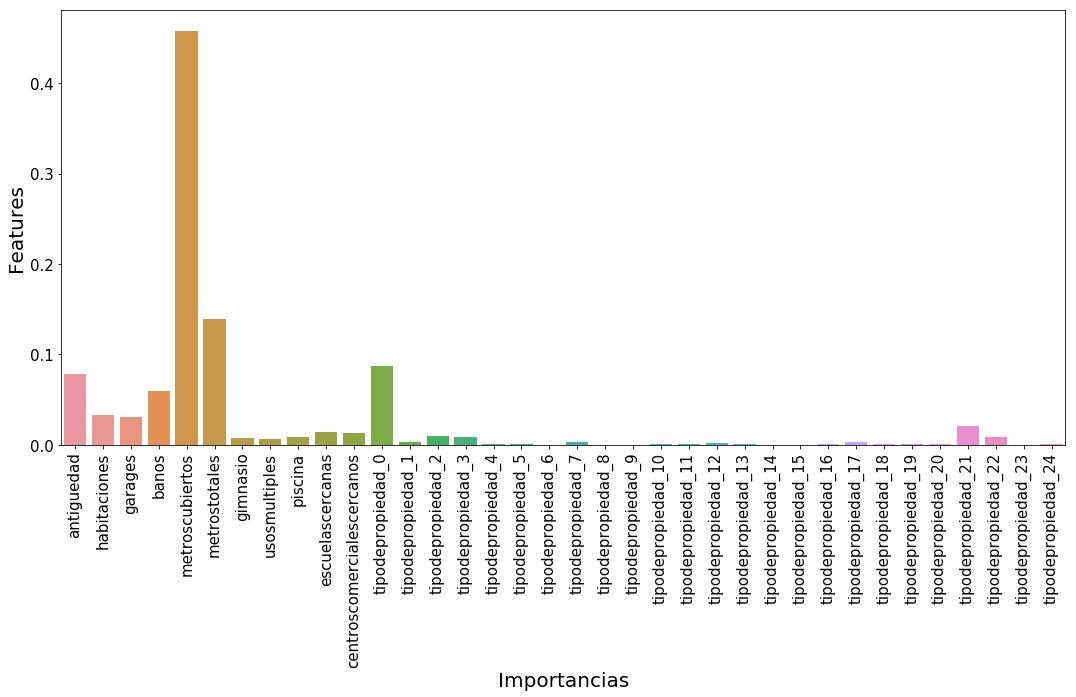

In [32]:
import seaborn as sns
plt.figure(figsize = (18,8))
graf = sns.barplot(x = importancias.feature, y = importancias.importancia, orient = 'v')
graf.set_xlabel("Importancias", fontsize = 20)
graf.set_ylabel("Features", fontsize = 20)
plt.xticks(fontsize = 15, rotation = 'vertical')
plt.yticks(fontsize = 15)

# Pruebo con KNN como BaseLine para nuestros modelos

In [33]:
from sklearn.neighbors import KNeighborsRegressor

In [34]:
#Por default toma n = 5
KNN_model = KNeighborsRegressor()

In [35]:
KNN_model.fit(X,Y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

## Utilizo la métrica MAE

In [36]:
# Con cross validation y n=5
scores = cross_val_score(KNN_model , X, Y, scoring="neg_mean_absolute_error", cv=10)
KNN_mae_score1 = -scores.mean()

In [37]:
KNN_mae_score1

974501.2167283334

In [38]:
# Otra Alternativa
from sklearn import metrics 
from sklearn.model_selection import train_test_split 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = None)   

KNN_model.fit(X_train, Y_train) 
  
Y_pred = KNN_model.predict(X_test) 
  
KNN_mae_score2 = metrics.mean_absolute_error(Y_test, Y_pred) 
KNN_mae_score2


977587.8004375

## KNN vs Random Forest

In [39]:
RF_mae_score1

901051.361447631

In [40]:
KNN_mae_score1

974501.2167283334

# ¿Qué pasa ahora si sólo me quedo con los features más importantes?

In [41]:
#Tomo los 25 features más importantes
mas_importantes = importancias.nlargest(25, columns = 'importancia')


(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5]), <a list of 6 Text yticklabel objects>)

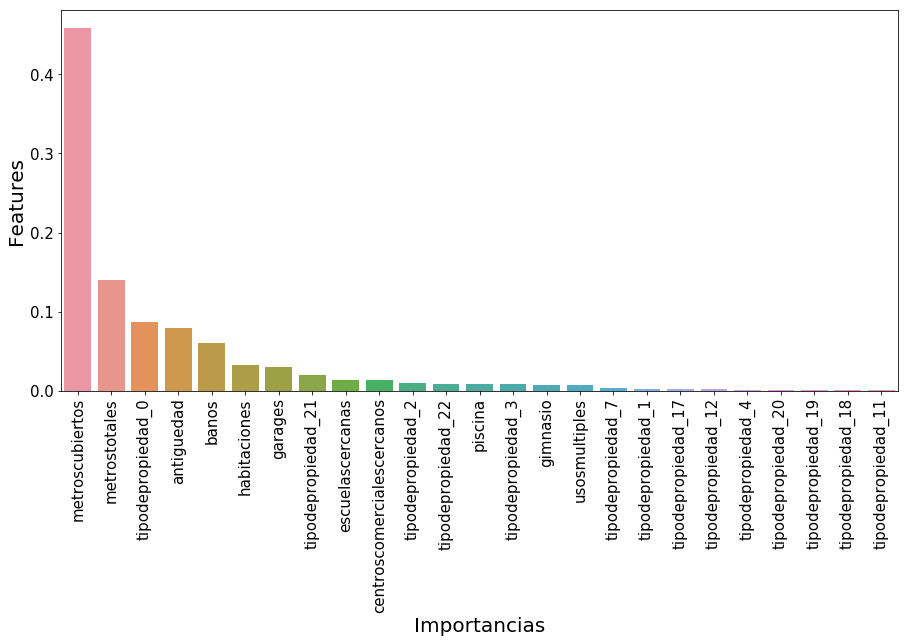

In [42]:
plt.figure(figsize = (15,7))
graf = sns.barplot(x = mas_importantes.feature, y = mas_importantes.importancia, orient = 'v')
graf.set_xlabel("Importancias", fontsize = 20)
graf.set_ylabel("Features", fontsize = 20)
plt.xticks(fontsize = 15, rotation = 'vertical')
plt.yticks(fontsize = 15)

In [43]:
features_mas_importantes = mas_importantes.feature
X_reducido = X.loc[:, list(features_mas_importantes)]

## Random Forest

In [44]:
RF_model.fit(X_reducido,Y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [45]:
scores = cross_val_score(RF_model , X_reducido, Y, scoring="neg_mean_absolute_error", cv=10)
RF_mae_score2 = -scores.mean()
RF_mae_score2

901340.5615961833

## KNN

In [46]:
KNN_model.fit(X_reducido,Y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [47]:
#Cross validation
scores = cross_val_score(KNN_model , X_reducido, Y, scoring="neg_mean_absolute_error", cv=10)
KNN_mae_score1_2 = -scores.mean()
KNN_mae_score1_2

974573.6661383333

In [48]:
# Otra Alternativa
X_train, X_test, Y_train, Y_test = train_test_split(X_reducido, Y, test_size = 0.2, random_state = None)   

KNN_model.fit(X_train, Y_train) 
  
Y_pred = KNN_model.predict(X_test) 
  
KNN_mae_score2_2 = metrics.mean_absolute_error(Y_test, Y_pred) 
KNN_mae_score2_2


986276.3661374999

## ¿Se vió afectado el score (MAE) al quedarnos sólo con los 25 features más importantes?

In [49]:
#Random Forest 
print("¿Empeoró el score?",(RF_mae_score2 > RF_mae_score1))

¿Empeoró el score? True


In [50]:
#KNN versión 1
print("¿Empeoró el score?",(KNN_mae_score1_2 > KNN_mae_score1))

¿Empeoró el score? True


In [51]:
#KNN versión 2
print("¿Empeoró el score?",(KNN_mae_score2_2 > KNN_mae_score2))

¿Empeoró el score? True


Vemos que el score se ve desmejorado en todos los casos, por lo que no es una buena idea reducir los features en esa cantidad (25)

# ¿Qué pasa si normalizo los datos?

In [52]:
from sklearn import preprocessing 
min_max_scaler = preprocessing.MinMaxScaler() 
np_scaled = min_max_scaler.fit_transform(X)
X_normalized = pd.DataFrame(np_scaled)

In [53]:
X_normalized.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,0.1000,0.111111,0.333333,0.333333,0.153302,0.153302,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.1250,0.222222,0.666667,0.333333,0.596698,0.389151,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0625,0.222222,0.666667,0.333333,0.304245,0.356132,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0125,0.111111,0.333333,0.000000,0.113208,0.122642,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.1250,0.111111,0.333333,0.000000,0.188679,0.188679,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Random Forest

In [54]:
RF_model.fit(X_normalized, Y)
scores = cross_val_score(RF_model , X_normalized, Y, scoring="neg_mean_absolute_error", cv=10)
RF_mae_score3 = -scores.mean()
RF_mae_score3

899382.4771352632

## ¿Se vió afectado el score (MAE) luego de normalizar los datos?

In [55]:
print("¿Empeoró el score?",(RF_mae_score3 > RF_mae_score1))

¿Empeoró el score? False


## Primer submit

In [56]:
X_test = test[Numericos].join(dummies_test)
X_test.head()

,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,gimnasio,usosmultiples,piscina,escuelascercanas,...,tipodepropiedad_13,tipodepropiedad_14,tipodepropiedad_15,tipodepropiedad_16,tipodepropiedad_17,tipodepropiedad_18,tipodepropiedad_19,tipodepropiedad_20,tipodepropiedad_21,tipodepropiedad_22
0,29,3,2,4,300,176,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,1,1,1,67,67,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2,1,2,87,100,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,2,2,2,86,86,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10,2,1,1,80,76,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [103]:
min_max_scaler = preprocessing.MinMaxScaler() 
np_scaled = min_max_scaler.fit_transform(X_test)
X_test_normalized = pd.DataFrame(np_scaled)

In [ ]:
#Tengo que reducir las columnas del train porque no matchean los tipos de propiedades con train y test
RF_model.fit(X_normalized.iloc[:,:34], Y)
result = RF_model.predict(X_test_normalized)
result

## File para el submit

In [114]:
final = test.loc[:, ['id']]
final['target'] = result
final.head()

,id,target
0,4941,2.788000e+06
1,51775,1.978764e+06
2,115253,2.092252e+06
3,299321,3.076112e+06
4,173570,7.200425e+05


In [115]:
#final.to_csv(path_or_buf = "data/submit2.csv", index = False )

In [116]:
prueba = pd.read_csv("data/submit2.csv")
prueba.head()

,id,target
0,4941,2.788000e+06
1,51775,1.978764e+06
2,115253,2.092252e+06
3,299321,3.076112e+06
4,173570,7.200425e+05


In [117]:
prueba.count()

id        60000
target    60000
dtype: int64

## Mejor score hasta ahora con X_normalized y X_test_normalized

# Creo nuevos features

Aplico la SVD a los features que tengo hasta el momento, y veo dónde se concentra la energía de la matriz. La idea es crear nuevos features a partir de esta información.

In [98]:
from scipy.linalg import svd
from scipy.sparse.linalg import svds

In [92]:
## normalizamos/centramos utilizando la media de tal forma que el promedio sea 0
centered = X - X.mean()

In [93]:
centered.shape

(240000, 36)

In [95]:
centered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 36 columns):
antiguedad                    240000 non-null float64
habitaciones                  240000 non-null float64
garages                       240000 non-null float64
banos                         240000 non-null float64
metroscubiertos               240000 non-null float64
metrostotales                 240000 non-null float64
gimnasio                      240000 non-null float64
usosmultiples                 240000 non-null float64
piscina                       240000 non-null float64
escuelascercanas              240000 non-null float64
centroscomercialescercanos    240000 non-null float64
tipodepropiedad_0             240000 non-null float64
tipodepropiedad_1             240000 non-null float64
tipodepropiedad_2             240000 non-null float64
tipodepropiedad_3             240000 non-null float64
tipodepropiedad_4             240000 non-null float64
tipodepropiedad_5        

In [165]:
#hago lo mismo para el set de test
centered_test = X_test - X_test.mean()

In [167]:
centered_test.shape

(60000, 34)

## Calculo la SVD

In [127]:
u, s, vt = svd(centered, full_matrices = False)

In [169]:
u_test, s_test, vt_test = svd(centered_test, full_matrices = False)

In [128]:
s

array([5.46569598e+04, 2.89552509e+04, 4.22530408e+03, 4.10027696e+02,
       3.63667383e+02, 3.23393648e+02, 3.05567737e+02, 2.58404734e+02,
       1.65164910e+02, 1.47769812e+02, 1.13803066e+02, 1.04250876e+02,
       9.99845427e+01, 8.54631685e+01, 6.52154340e+01, 4.80765362e+01,
       3.99577521e+01, 3.73521076e+01, 3.66234060e+01, 2.78256083e+01,
       2.15162493e+01, 1.92245706e+01, 1.84485443e+01, 1.49031624e+01,
       1.35299502e+01, 1.29227726e+01, 1.21144021e+01, 1.16702798e+01,
       8.91107265e+00, 6.94117520e+00, 5.68711667e+00, 4.56084314e+00,
       2.28512581e+00, 1.04170263e+00, 9.99959075e-01, 5.33104331e-12])

Grafico los autovalores para detectar codos

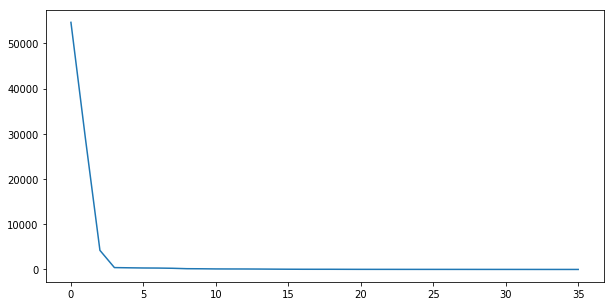

In [171]:
#Set train
plt.figure(figsize = (10,5))
plt.plot(s)

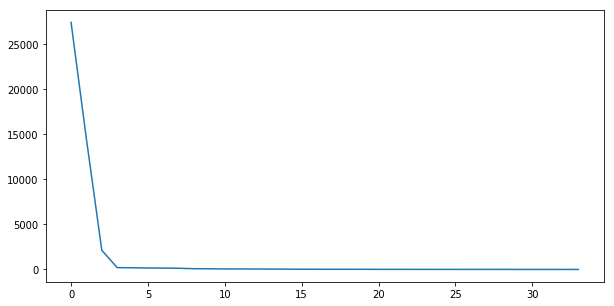

In [173]:
#Set test
plt.figure(figsize = (10,5))
plt.plot(s_test)

Claramente vemos como con 3 dimensiones podemos concentrar casi la totalidad de los datos. Veamos esto en niveles de energía

In [134]:
singular_values = s
energy_total = sum(singular_values**2)
sv_pow = singular_values**2
energy_percentage = ((sv_pow / energy_total) * 100)
print(energy_percentage)

[7.77091733e+01 2.18090130e+01 4.64405425e-01 4.37328453e-03
 3.44025036e-03 2.72047236e-03 2.42882566e-03 1.73692985e-03
 7.09605411e-04 5.68005821e-04 3.36890895e-04 2.82709742e-04
 2.60044143e-04 1.89993755e-04 1.10632347e-04 6.01239754e-05
 4.15320571e-05 3.62920559e-05 3.48898266e-05 2.01405201e-05
 1.20424398e-05 9.61379031e-06 8.85330760e-06 5.77747688e-06
 4.76182841e-06 4.34402935e-06 3.81755513e-06 3.54277753e-06
 2.06557665e-06 1.25327784e-06 8.41328542e-07 5.41092630e-07
 1.35831838e-07 2.82272692e-08 2.60103263e-08 7.39274574e-31]


In [135]:
energy_total

3844312225.3598347

Ahora veo la energia acumulada 


**Set de train**

In [136]:
acumulated_energy = 0
for i in range(len(energy_percentage)):
    acumulated_energy = acumulated_energy + energy_percentage[i]
    print ('Number of Singular Values ' + str(i+1) + ': ' + str(singular_values[i]) + ' ' + str(round(acumulated_energy,2)) + '%')

Number of Singular Values 1: 54656.95975127302 77.71%
Number of Singular Values 2: 28955.250878045925 99.52%
Number of Singular Values 3: 4225.304075195341 99.98%
Number of Singular Values 4: 410.02769636107814 99.99%
Number of Singular Values 5: 363.66738263648045 99.99%
Number of Singular Values 6: 323.3936478295409 99.99%
Number of Singular Values 7: 305.56773661553086 100.0%
Number of Singular Values 8: 258.4047336677226 100.0%
Number of Singular Values 9: 165.1649101825018 100.0%
Number of Singular Values 10: 147.76981158243365 100.0%
Number of Singular Values 11: 113.80306618758048 100.0%
Number of Singular Values 12: 104.25087605515304 100.0%
Number of Singular Values 13: 99.98454269060112 100.0%
Number of Singular Values 14: 85.4631684975557 100.0%
Number of Singular Values 15: 65.21543397626348 100.0%
Number of Singular Values 16: 48.07653623455523 100.0%
Number of Singular Values 17: 39.95775205378842 100.0%
Number of Singular Values 18: 37.352107614655175 100.0%
Number of Si

Veo que con 3 dimensiones tengo el 99.98% de la energía acumulada, y con 7 llego a un 100%.

Puedo tomar las primeras 3 columnas de U y multiplicarlas por las 3 primeras filas y columnas de S y agregar esas columnas como features

In [157]:
#set de train
k = 3
aprox3 = np.matrix(u[:, :k]) * np.diag(s[:k]) 

In [175]:
features = pd.DataFrame(aprox3)
features.head()

,0,1,2
0,-133.929111,-16.609546,-0.467449
1,75.276285,-56.375915,-1.300524
2,-30.186889,10.374778,2.906306
3,-155.359735,-16.070155,6.419846
4,-112.836916,-14.313502,-2.386550


In [163]:
X_normalized[['feature_svd1', 'feature_svd2', 'feature_svd3']] = features

In [164]:
X_normalized.head()

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,feature_svd1,feature_svd2,feature_svd3
0,0.1000,0.111111,0.333333,0.333333,0.153302,0.153302,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-133.929111,-16.609546,-0.467449
1,0.1250,0.222222,0.666667,0.333333,0.596698,0.389151,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75.276285,-56.375915,-1.300524
2,0.0625,0.222222,0.666667,0.333333,0.304245,0.356132,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-30.186889,10.374778,2.906306
3,0.0125,0.111111,0.333333,0.000000,0.113208,0.122642,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-155.359735,-16.070155,6.419846
4,0.1250,0.111111,0.333333,0.000000,0.188679,0.188679,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-112.836916,-14.313502,-2.386550


In [174]:
RF_model.fit(X_normalized, Y)
scores = cross_val_score(RF_model , X_normalized, Y, scoring="neg_mean_absolute_error", cv=10)
RF_mae_score4 = -scores.mean()
RF_mae_score4

892657.8692743998

In [176]:
#¿Qué paso con el score luego de agregar estos features?
print("¿Empeoró el score?",(RF_mae_score4 > RF_mae_score3))

¿Empeoró el score? False


In [177]:
#Set de test
aprox3_test = np.matrix(u_test[:, :k]) * np.diag(s_test[:k]) 

In [178]:
features_test = pd.DataFrame(aprox3_test)
features_test.head()

,0,1,2
0,98.364338,79.361017,-19.960875
1,-151.698287,18.429702,-0.527061
2,-115.478721,5.172517,7.581936
3,-125.008204,15.477007,5.595347
4,-135.911880,19.561056,-2.451152


In [179]:
X_test_normalized[['feature_svd1', 'feature_svd2', 'feature_svd3']] = features_test

## Genero un nuevo submit

In [181]:
X_test_normalized.shape

(60000, 37)

In [182]:
X_normalized.shape

(240000, 39)

In [183]:
X_test_normalized.columns

Index([             0,              1,              2,              3,
                    4,              5,              6,              7,
                    8,              9,             10,             11,
                   12,             13,             14,             15,
                   16,             17,             18,             19,
                   20,             21,             22,             23,
                   24,             25,             26,             27,
                   28,             29,             30,             31,
                   32,             33, 'feature_svd1', 'feature_svd2',
       'feature_svd3'],
      dtype='object')

In [184]:
X_normalized.columns

Index([             0,              1,              2,              3,
                    4,              5,              6,              7,
                    8,              9,             10,             11,
                   12,             13,             14,             15,
                   16,             17,             18,             19,
                   20,             21,             22,             23,
                   24,             25,             26,             27,
                   28,             29,             30,             31,
                   32,             33,             34,             35,
       'feature_svd1', 'feature_svd2', 'feature_svd3'],
      dtype='object')

In [186]:
#Tengo que reducir las columnas del train porque no matchean los tipos de propiedades con train y test
RF_model.fit(X_normalized.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,36,37,38]], Y)
result = RF_model.predict(X_test_normalized)
result

array([4894500. , 1925267.9, 2433002. , ..., 1185000. , 1249500. ,
       3107360. ])

In [187]:
final = test.loc[:, ['id']]
final['target'] = result
final.to_csv(path_or_buf = "data/submit3.csv", index = False )

In [189]:
final.shape

(60000, 2)

In [190]:
df = pd.read_csv("data/submit3.csv")
df.head()

,id,target
0,4941,4.894500e+06
1,51775,1.925268e+06
2,115253,2.433002e+06
3,299321,3.095684e+06
4,173570,6.280714e+05
